Data visualization plays a significant role in feature importance and feature selection by helping data scientists gain insights into the relationships between features and the target variable. Here's how data visualization aids in these tasks:

**1. Feature Importance:** Decision trees and ensemble models (e.g., Random Forest, Gradient Boosting) provide built-in feature importance scores. Plotting these scores as a bar chart or a line graph helps identify the most influential features.

**2. Feature Selection:** By setting a threshold on the feature importance scores, ML engineer can decide to keep only the top-ranking features and discard the rest. 

This helps in :


    1. Reducing the dimensionality
    2. Improving model performance and reducing overfitting
    3. Reducing training time

In [1]:
# first import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Optional
# for filter warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# import dataset 
df = pd.read_csv('../input/bank-loan-simple-dataset/example_dataset.csv')
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [3]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [4]:
# Predict on the test set results
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9850


Now, I will use the feature importance variable to see feature importance scores.

# Feature Importance

### Random Forest  provide built-in feature importance scores

In [5]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores


Income                0.463570
Education             0.209831
Family                0.126912
Age                   0.065167
CD Account            0.054142
Mortgage              0.047819
CreditCard            0.015329
Online                0.011019
Securities Account    0.006211
dtype: float64

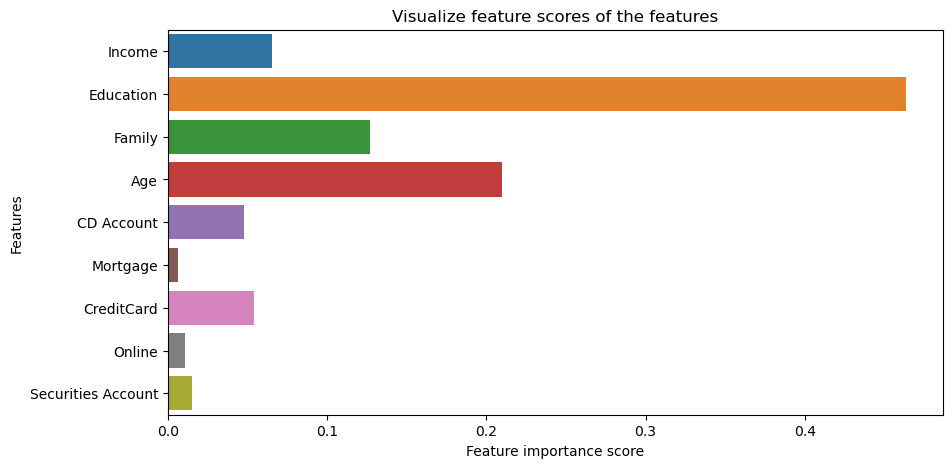

In [6]:
#Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=clf.feature_importances_, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# (pd.Series(clf.feature_importances_, index=feature_scores.index)
#    .plot(kind='barh')) 